In [1]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cartopy.crs as ccrs
from numpy.ma import MaskedArray
import kdtree as kd
import pykdtree
import sklearn.neighbors as sk
import scipy.spatial as sp
import glob
%matplotlib inline

In [39]:
for year in range (2000,2017):
    for month in range(1,13):
        isccp = xr.open_mfdataset('/disk1/Data/ISCCP/access/isccp-basic/hgg/'+str(year)+str(month).zfill(2)+'/*.nc')
        print(str(year)+str(month).zfill(2)+' opened')
        isccp.close()

200001 opened
200002 opened
200003 opened
200004 opened
200005 opened
200006 opened
200007 opened
200008 opened
200009 opened
200010 opened
200011 opened
200012 opened


KeyboardInterrupt: 

In [2]:
for year in range(2000,2016):
isccp = xr.open_mfdataset('/disk1/Data/ISCCP/access/isccp-basic/hgg/200001/*.nc')

In [3]:
ctp = np.where(isccp['pc']<0,np.nan,isccp['pc'])
cf = np.where(isccp['cldamt']>100,np.nan,isccp['cldamt'])
tau = np.where(isccp['tau']<0,np.nan,isccp['tau'])

albedo = tau ** 0.895 / ((tau**0.895) + 6.82)

time = isccp['time']
lat = isccp['lat']
lon = isccp['lon']

In [4]:
ctp_norm = ctp/1025 
cf_norm = cf/100
alb_norm = albedo/1

In [5]:
#ISCCP-H WS CENTROIDS

#r = [albedo,ctp,cf]
r1 = (0.546,242.6/1100,99.5/100) # Deep Convective - RFO-9.56%
r2 = (0.543,433.6/1100,99.2/100) 
r3 = (0.147,316.3/1100,79.9/100)
r4 = (0.229,395.6/1100,84.5/100)
r5 = (0.524,606.9/1100,97.2/100)
r6 = (0.293,645.1/1100,40.0/100)
r7 = (0.336,840.1/1100,79.6/100)
r8 = (0.432,725.5/1100,90.7/100)
datapoints = [r1,r2,r3,r4,r5,r6,r7,r8]

In [6]:
def clusteredmap(time,regime,property):

    newmap = np.ma.masked_all((len(lats),len(lons)))

    for lon in range(len(lons)):
        for lat in range(len(lats)):
            pixel = (alb[time, lat, lon], ctp[time, lat, lon], cf[time, lat, lon])
            group = kd.kdtree_closest_point(kdtree,pixel)

            if (group == regime):
                newmap[lat,lon] = property[time,lat,lon]

    return newmap

In [7]:
def regimes(prop):
    output_array = np.ma.masked_all((8,len(time),len(lat),len(lon)),dtype=np.float32)
    for i in range(7):
        prod = (prop.flatten() * (np.ma.masked_not_equal(nnint, i) + 1)) / (i+1)
        output_array[i] = prod.reshape(cf.shape)
    return output_array

In [8]:
skdtree = sp.cKDTree(datapoints)
print('skdtree done')

data = np.transpose([alb_norm.flatten(),ctp_norm.flatten(),cf_norm.flatten()])
print('data transposed')
nndist, nnint  = skdtree.query(data,k=1,n_jobs=10)
print('nearest neigbours done')

cot_r = regimes(alb_norm)
print('regimes created')

skdtree done
data transposed


/home/gah20/.conda/envs/py3_jl/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The n_jobs argument has been renamed "workers". The old name "n_jobs" will stop working in SciPy 1.8.0.
  


nearest neigbours done
regimes created


In [27]:
dccraw = np.where(isccp['tc']<220,cot_r[0].filled(np.nan),np.nan)
dcc_final = np.where(dccraw<0.5,np.nan,dccraw)


In [ ]:
ft = nc.Dataset('/disk1/gah20/DCC/DCC_'+str().nc','w',format='NETCDF4')

In [2]:
DCC2000 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2000/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2001 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2001/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2002 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2002/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2003 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2003/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2004 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2004/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2005 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2005/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2006 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2006/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2007 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2007/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2008 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2008/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2009 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2009/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2010 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2010/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2011 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2011/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2012 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2012/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2013 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2013/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2014 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2014/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2015 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2015/*.nc',concat_dim='time',combine='nested')['DCC']
DCC2016 = xr.open_mfdataset('/disk1/Users/gah20/DCC/2016/*.nc',concat_dim='time',combine='nested')['DCC']

In [3]:

SUM2000 = np.nansum(np.where(np.isnan(DCC2000[:,60:120]),np.nan,1),axis=0)
SUM2001 = np.nansum(np.where(np.isnan(DCC2001[:,60:120]),np.nan,1),axis=0)
SUM2002 = np.nansum(np.where(np.isnan(DCC2002[:,60:120]),np.nan,1),axis=0)
SUM2003 = np.nansum(np.where(np.isnan(DCC2003[:,60:120]),np.nan,1),axis=0)
SUM2004 = np.nansum(np.where(np.isnan(DCC2004[:,60:120]),np.nan,1),axis=0)
SUM2005 = np.nansum(np.where(np.isnan(DCC2005[:,60:120]),np.nan,1),axis=0)
SUM2006 = np.nansum(np.where(np.isnan(DCC2006[:,60:120]),np.nan,1),axis=0)
SUM2007 = np.nansum(np.where(np.isnan(DCC2007[:,60:120]),np.nan,1),axis=0)
SUM2008 = np.nansum(np.where(np.isnan(DCC2008[:,60:120]),np.nan,1),axis=0)
SUM2009 = np.nansum(np.where(np.isnan(DCC2009[:,60:120]),np.nan,1),axis=0)
SUM2010 = np.nansum(np.where(np.isnan(DCC2010[:,60:120]),np.nan,1),axis=0)
SUM2011 = np.nansum(np.where(np.isnan(DCC2011[:,60:120]),np.nan,1),axis=0)
SUM2012 = np.nansum(np.where(np.isnan(DCC2012[:,60:120]),np.nan,1),axis=0)
SUM2013 = np.nansum(np.where(np.isnan(DCC2013[:,60:120]),np.nan,1),axis=0)
SUM2014 = np.nansum(np.where(np.isnan(DCC2014[:,60:120]),np.nan,1),axis=0)
SUM2015 = np.nansum(np.where(np.isnan(DCC2015[:,60:120]),np.nan,1),axis=0)
SUM2016 = np.nansum(np.where(np.isnan(DCC2016[:,60:120]),np.nan,1),axis=0)

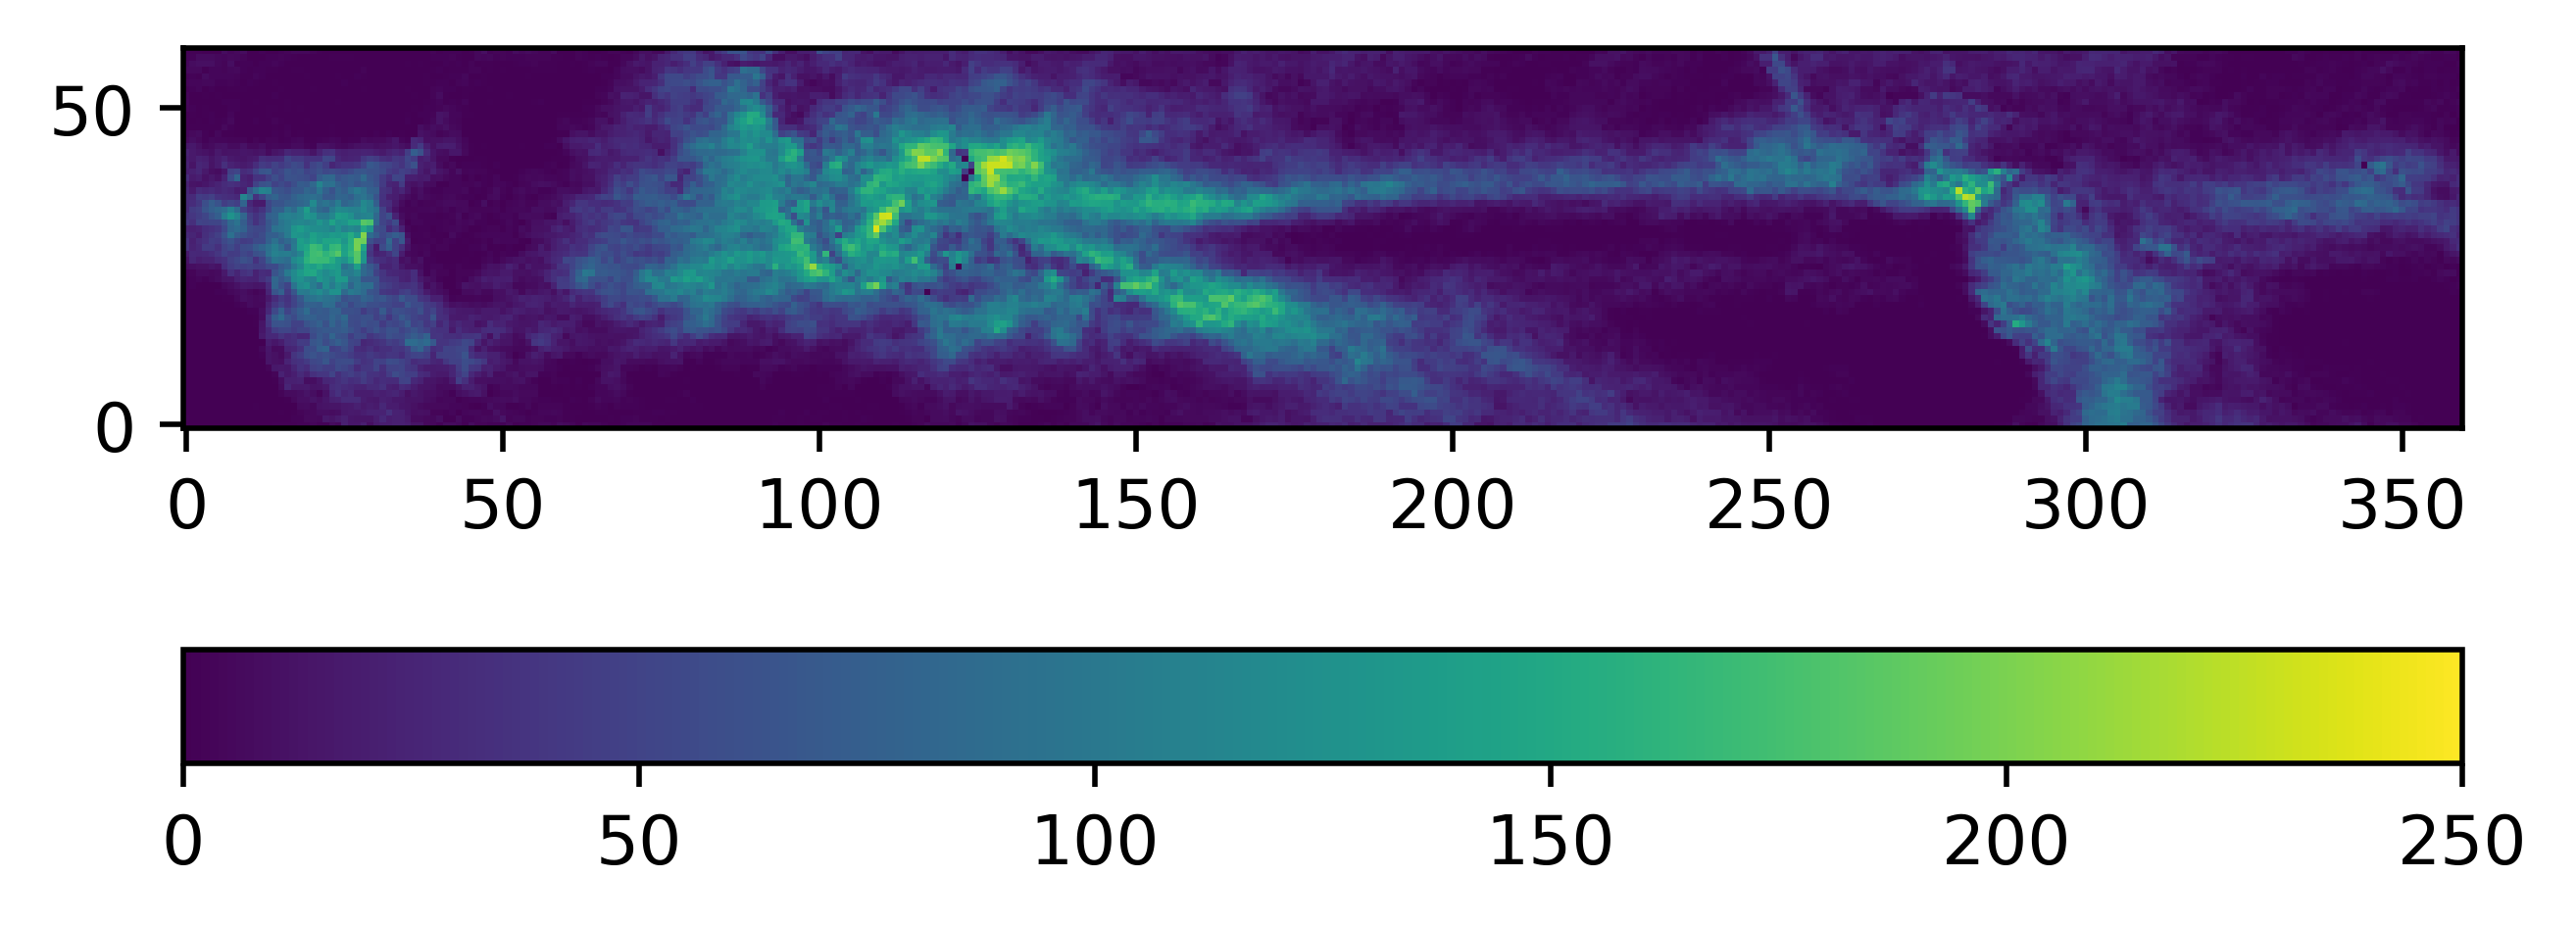

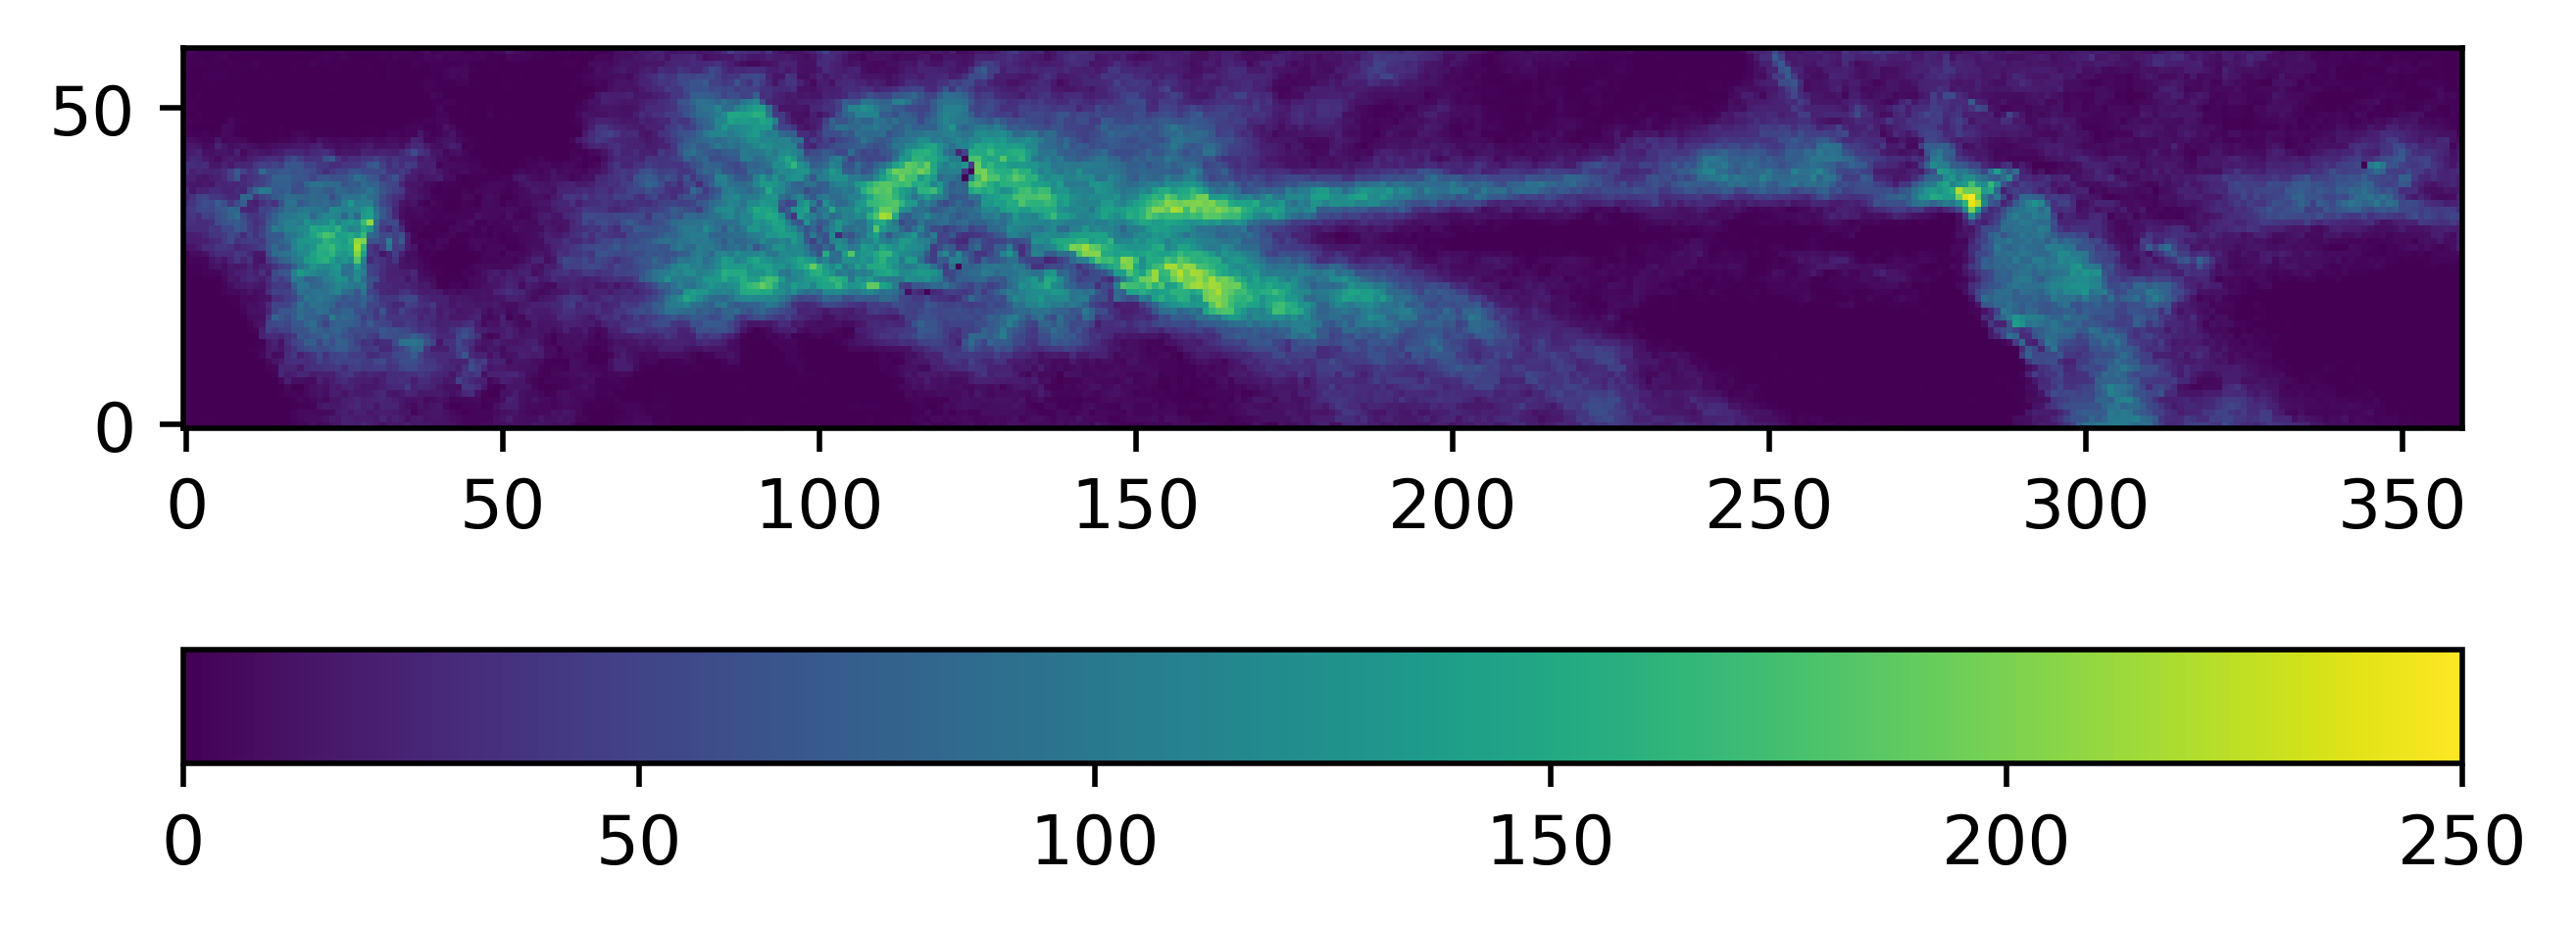

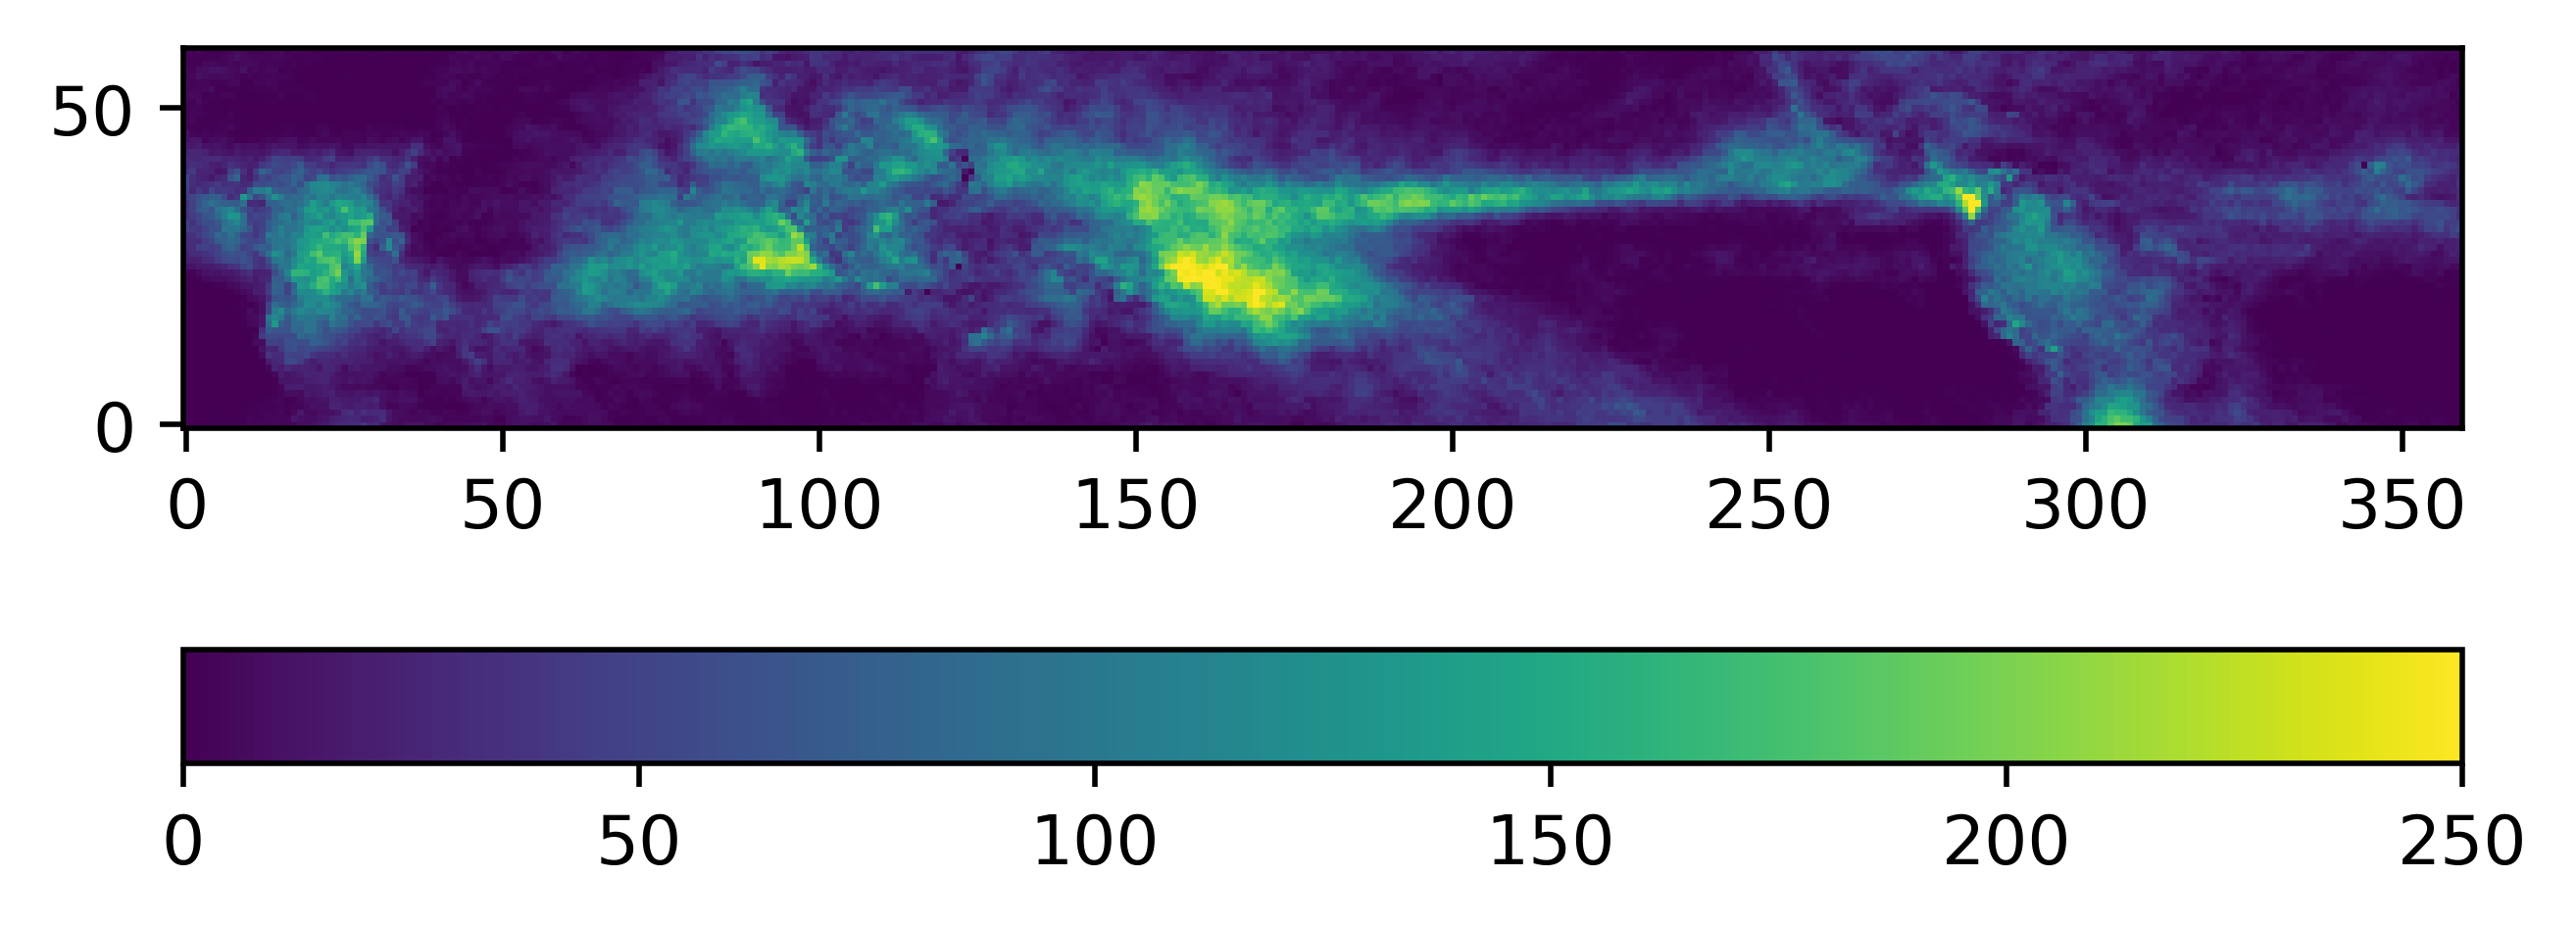

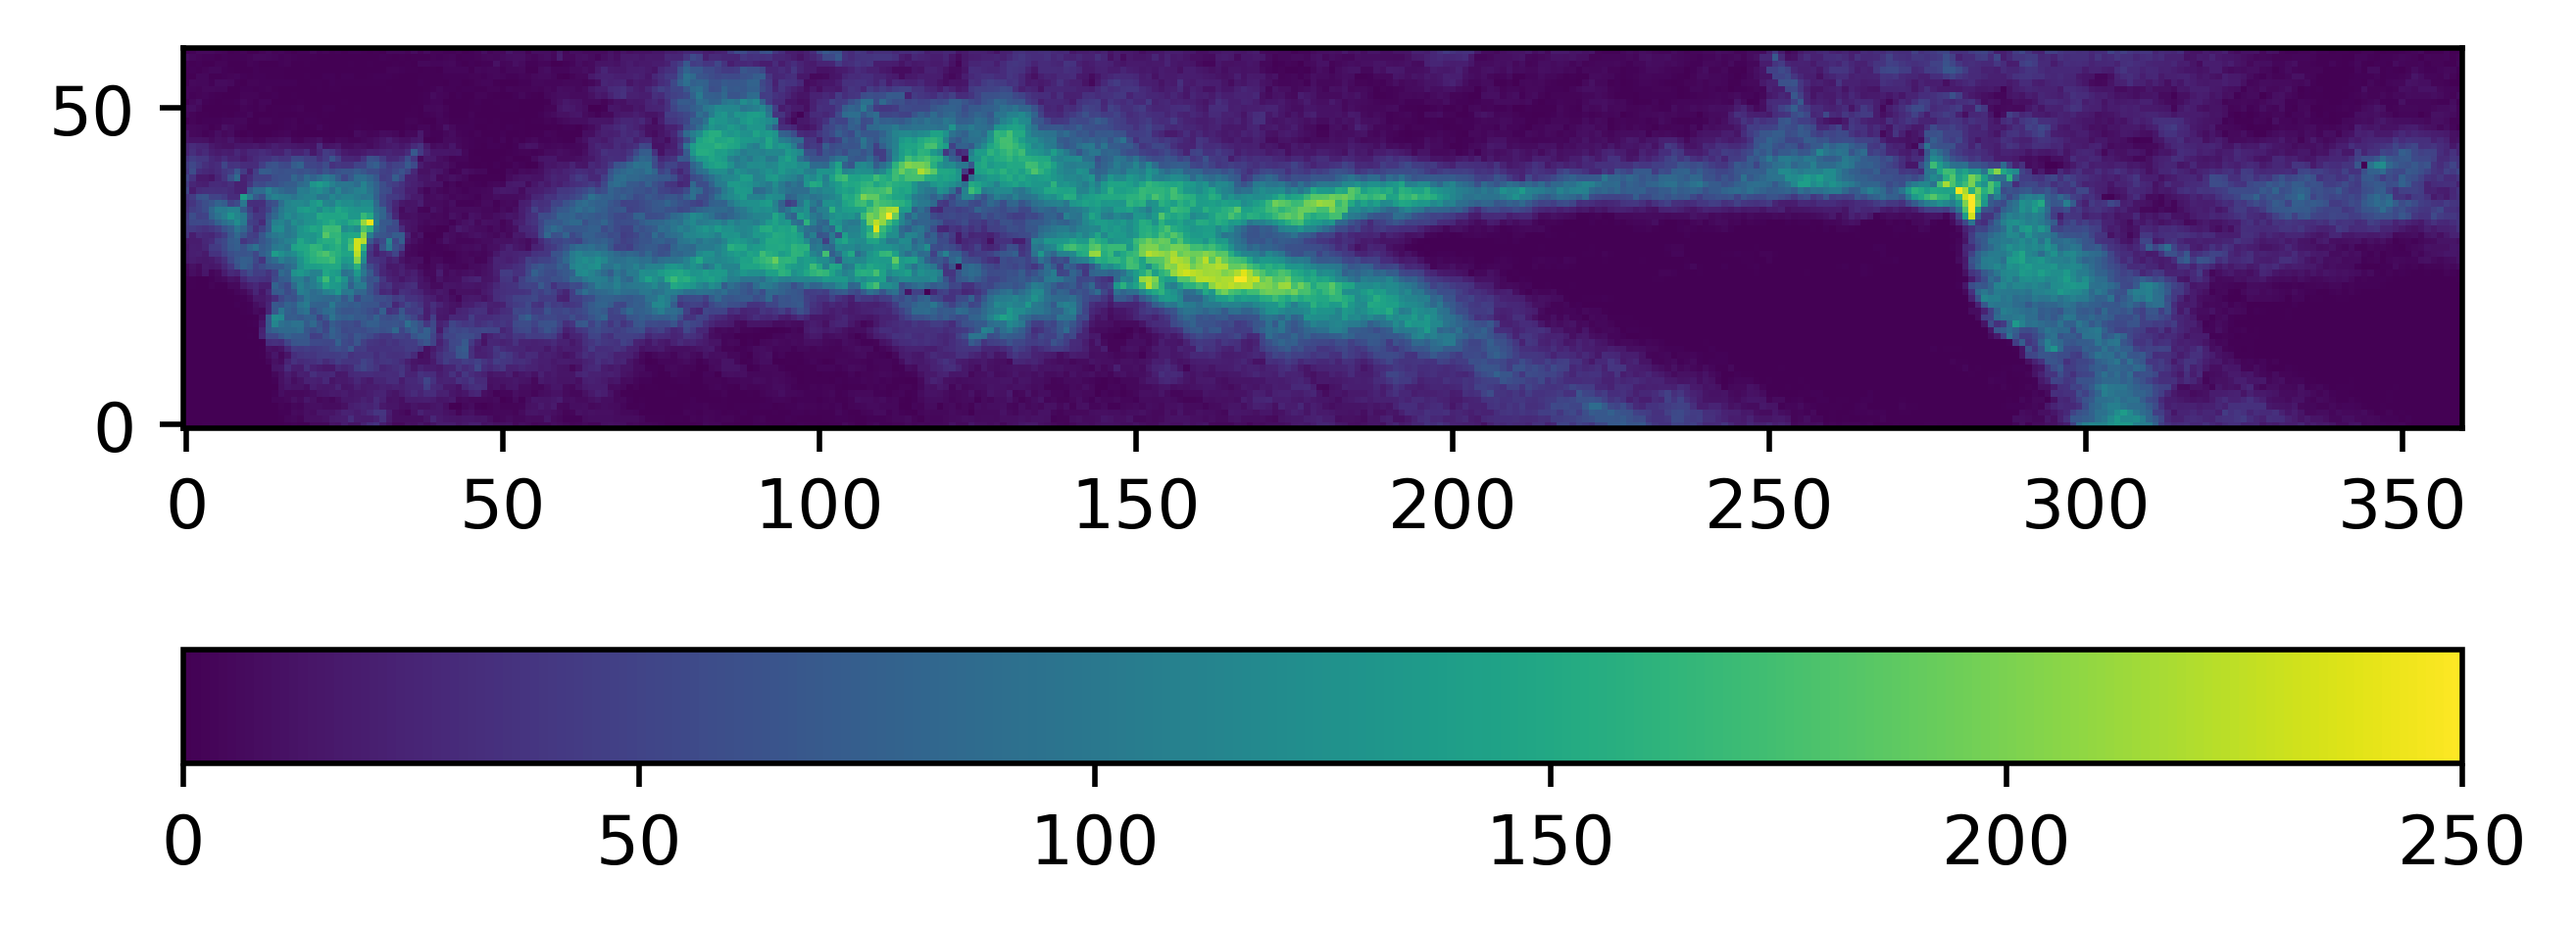

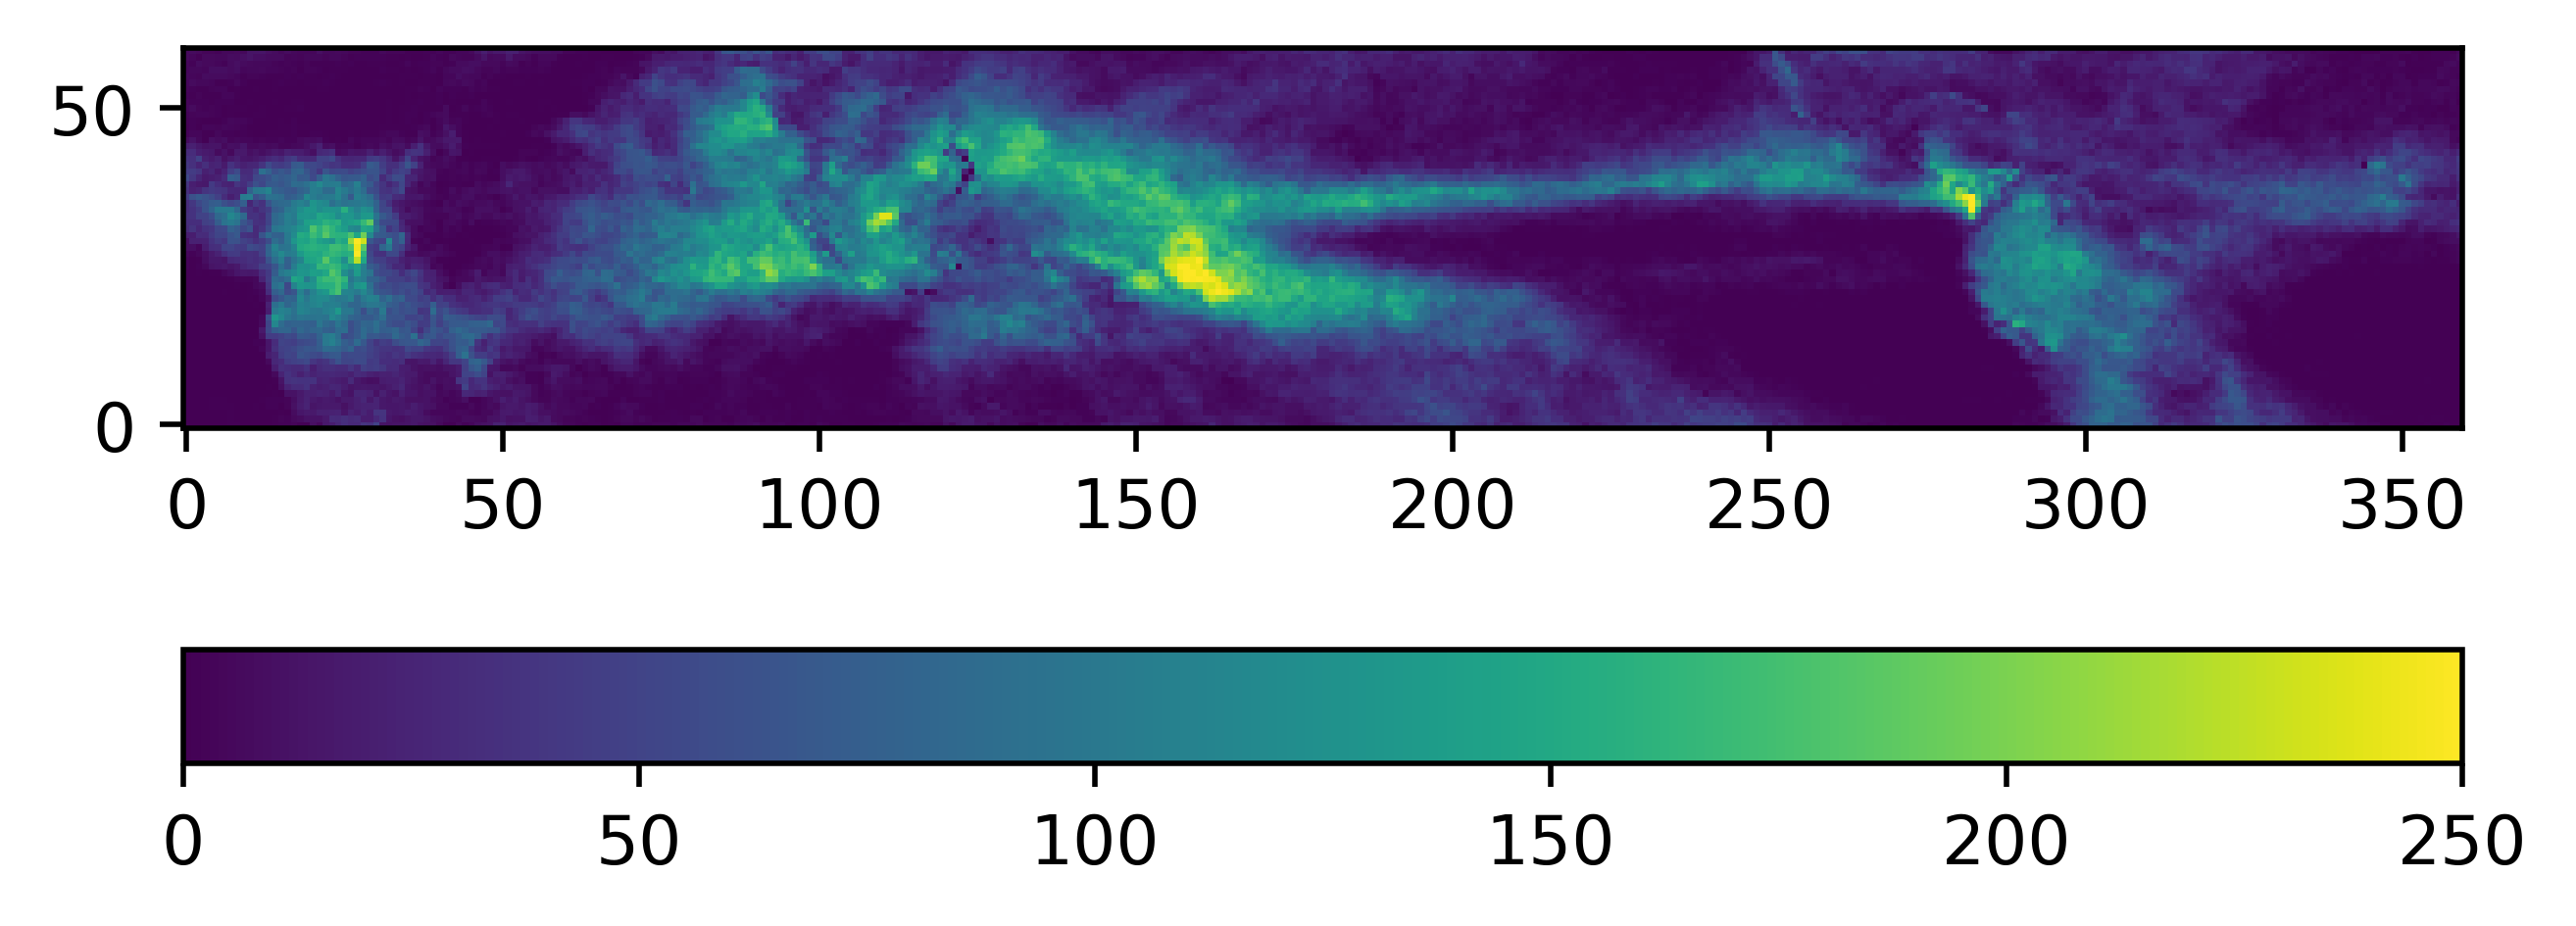

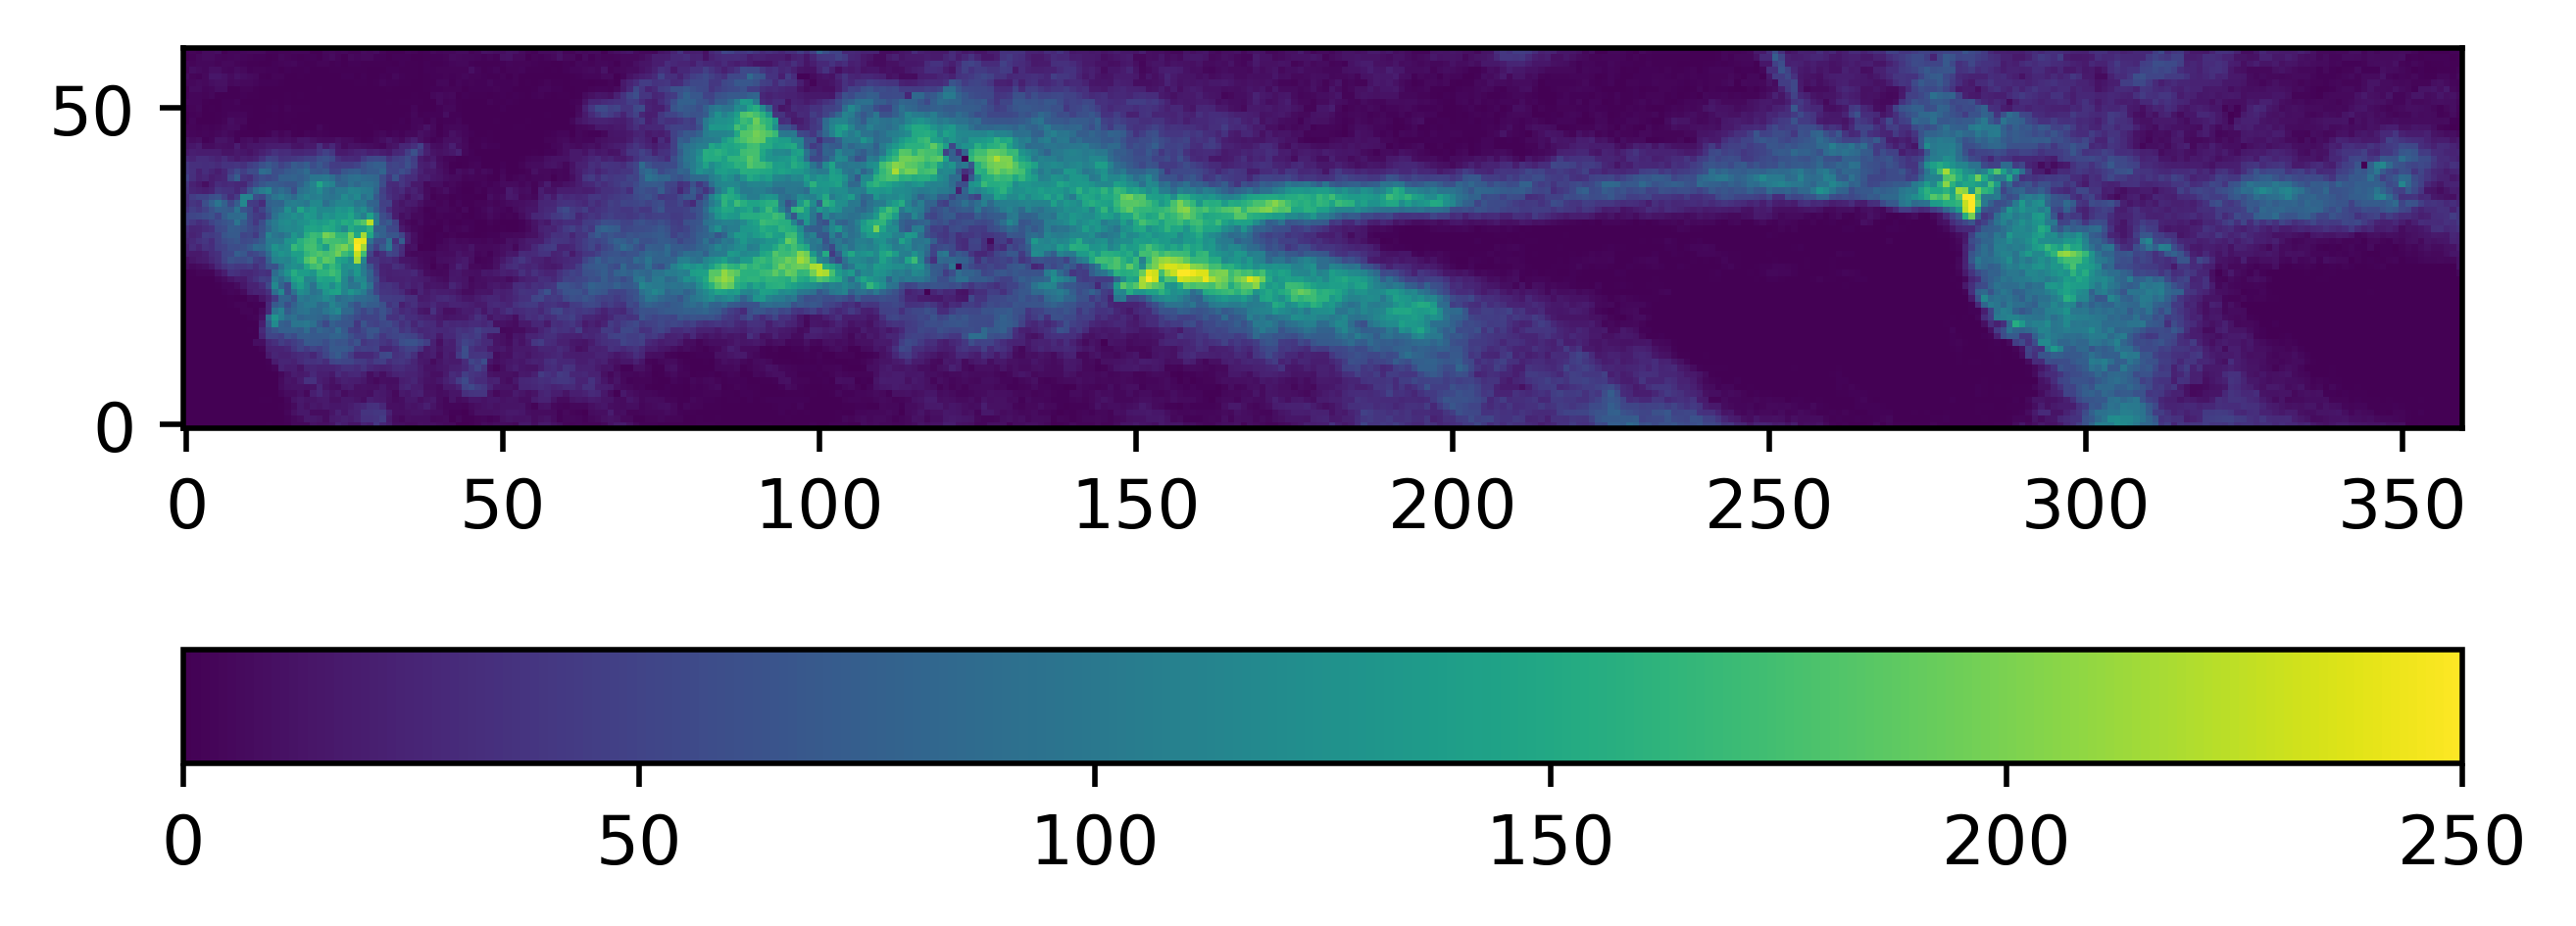

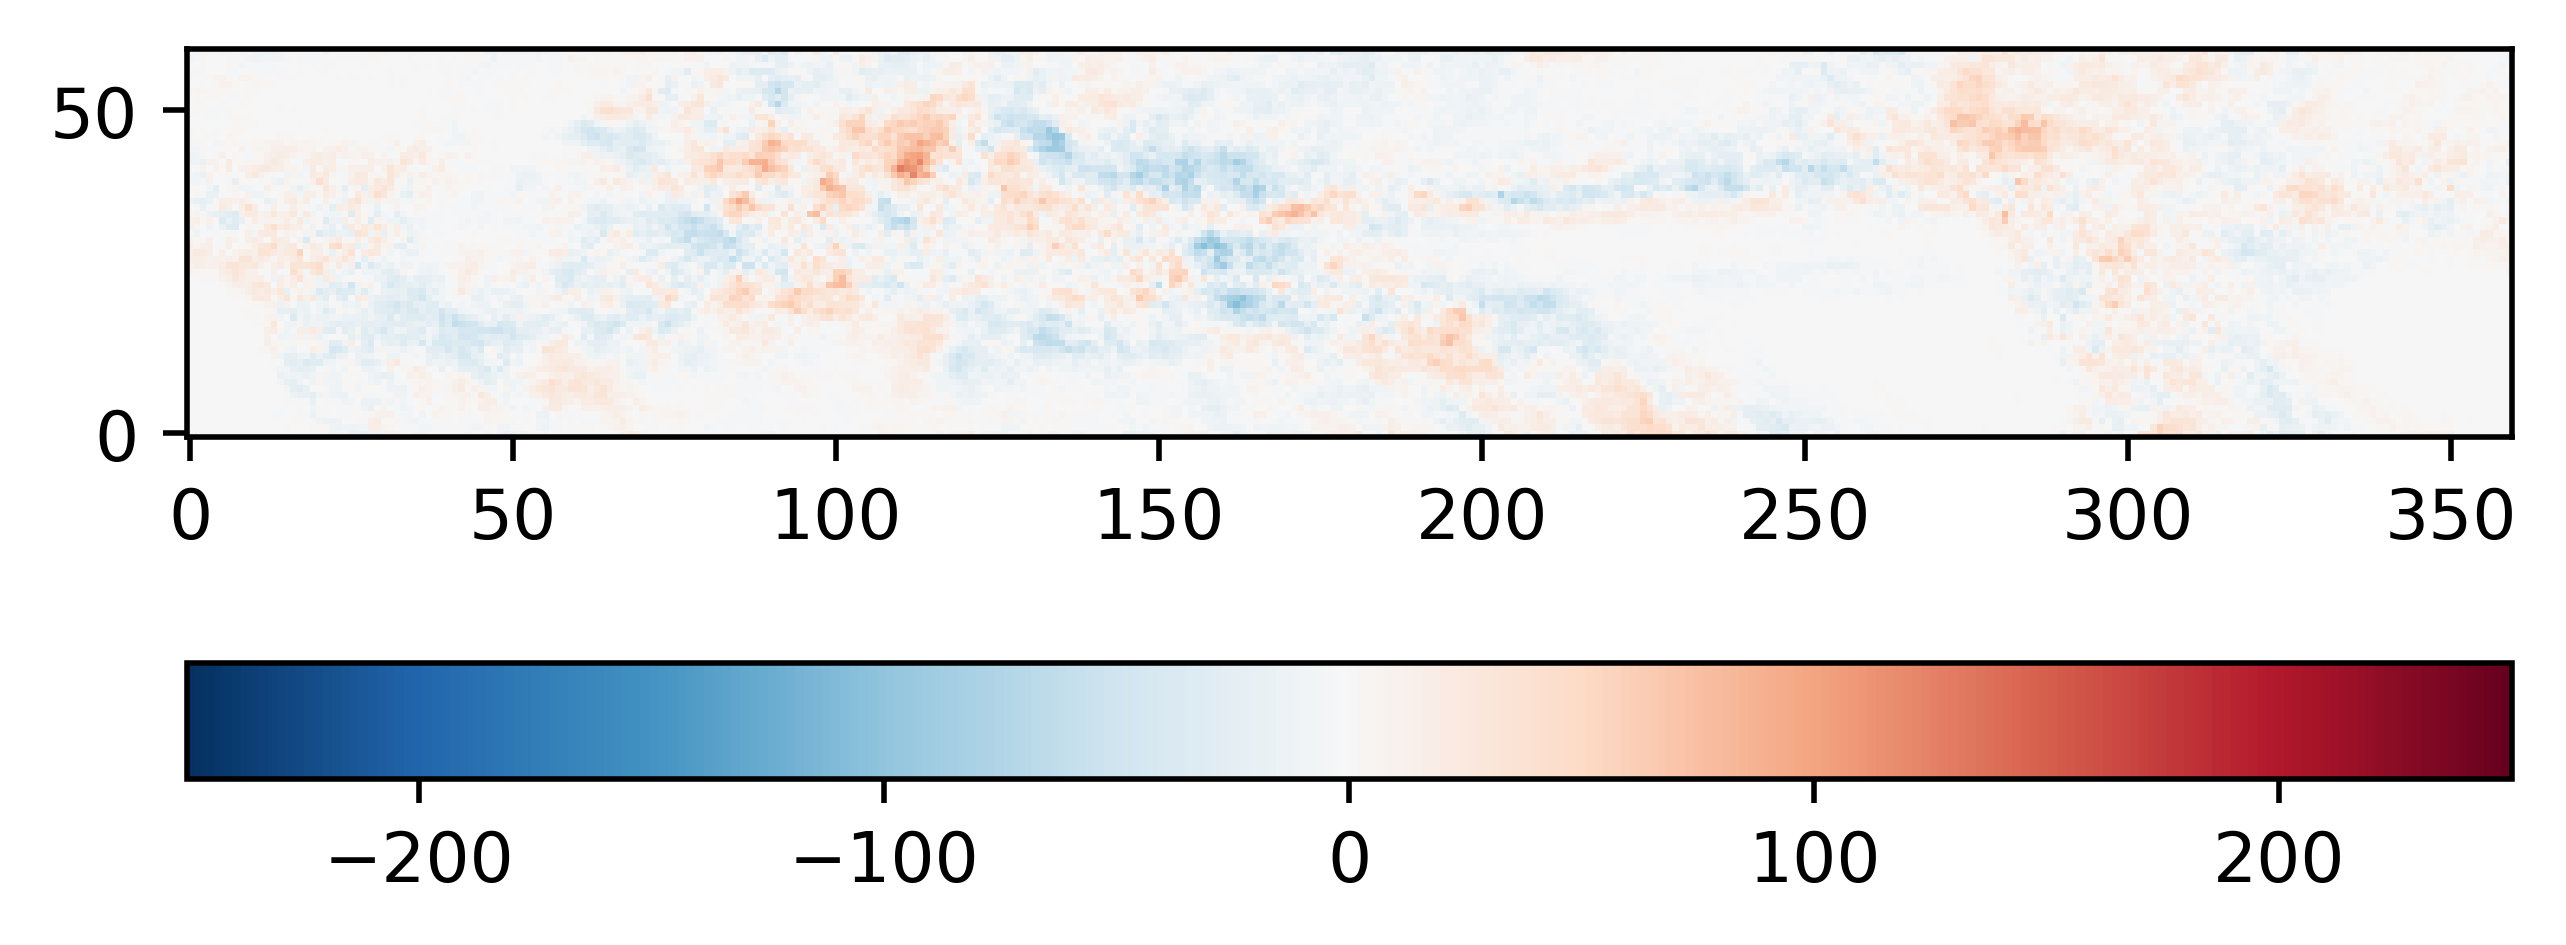

In [85]:
plt.figure(dpi=500)
plt.imshow(SUM2000,interpolation='none',origin='lower',vmax=250)
plt.colorbar(orientation='horizontal')

plt.figure(dpi=500)
plt.imshow(SUM2001,interpolation='none',origin='lower',vmax=250)
plt.colorbar(orientation='horizontal')

plt.figure(dpi=500)
plt.imshow(SUM2002,interpolation='none',origin='lower',vmax=250)
plt.colorbar(orientation='horizontal')

plt.figure(dpi=500)
plt.imshow(SUM2003,interpolation='none',origin='lower',vmax=250)
plt.colorbar(orientation='horizontal')

plt.figure(dpi=500)
plt.imshow(SUM2004,interpolation='none',origin='lower',vmax=250)
plt.colorbar(orientation='horizontal')

plt.figure(dpi=500)
plt.imshow(SUM2005,interpolation='none',origin='lower',vmax=250)
plt.colorbar(orientation='horizontal')



plt.figure(dpi=500)
plt.imshow(SUM2005-SUM2004,interpolation='none',origin='lower',vmax=250,vmin=-250,cmap='RdBu_r')
plt.colorbar(orientation='horizontal')

In [60]:
elnino = np.nanmean((np.nanmean(SUM2003,axis=1),np.nanmean(SUM2007,axis=1),np.nanmean(SUM2010,axis=1),np.nanmean(SUM2016,axis=1)),axis=0)
restofyears = np.nanmean((np.nanmean(SUM2001,axis=1),np.nanmean(SUM2002,axis=1),np.nanmean(SUM2004,axis=1),np.nanmean(SUM2005,axis=1),np.nanmean(SUM2006,axis=1),np.nanmean(SUM2009,axis=1)),axis=0)
lanina = np.nanmean((np.nanmean(SUM2000,axis=1),np.nanmean(SUM2008,axis=1),np.nanmean(SUM2011,axis=1),np.nanmean(SUM2012,axis=1)),axis=0)

In [65]:
elninomap = np.nanmean((SUM2003,SUM2007,SUM2010,SUM2016),axis=0)
laninamap = np.nanmean((SUM2000,SUM2008,SUM2011,SUM2012),axis=0)

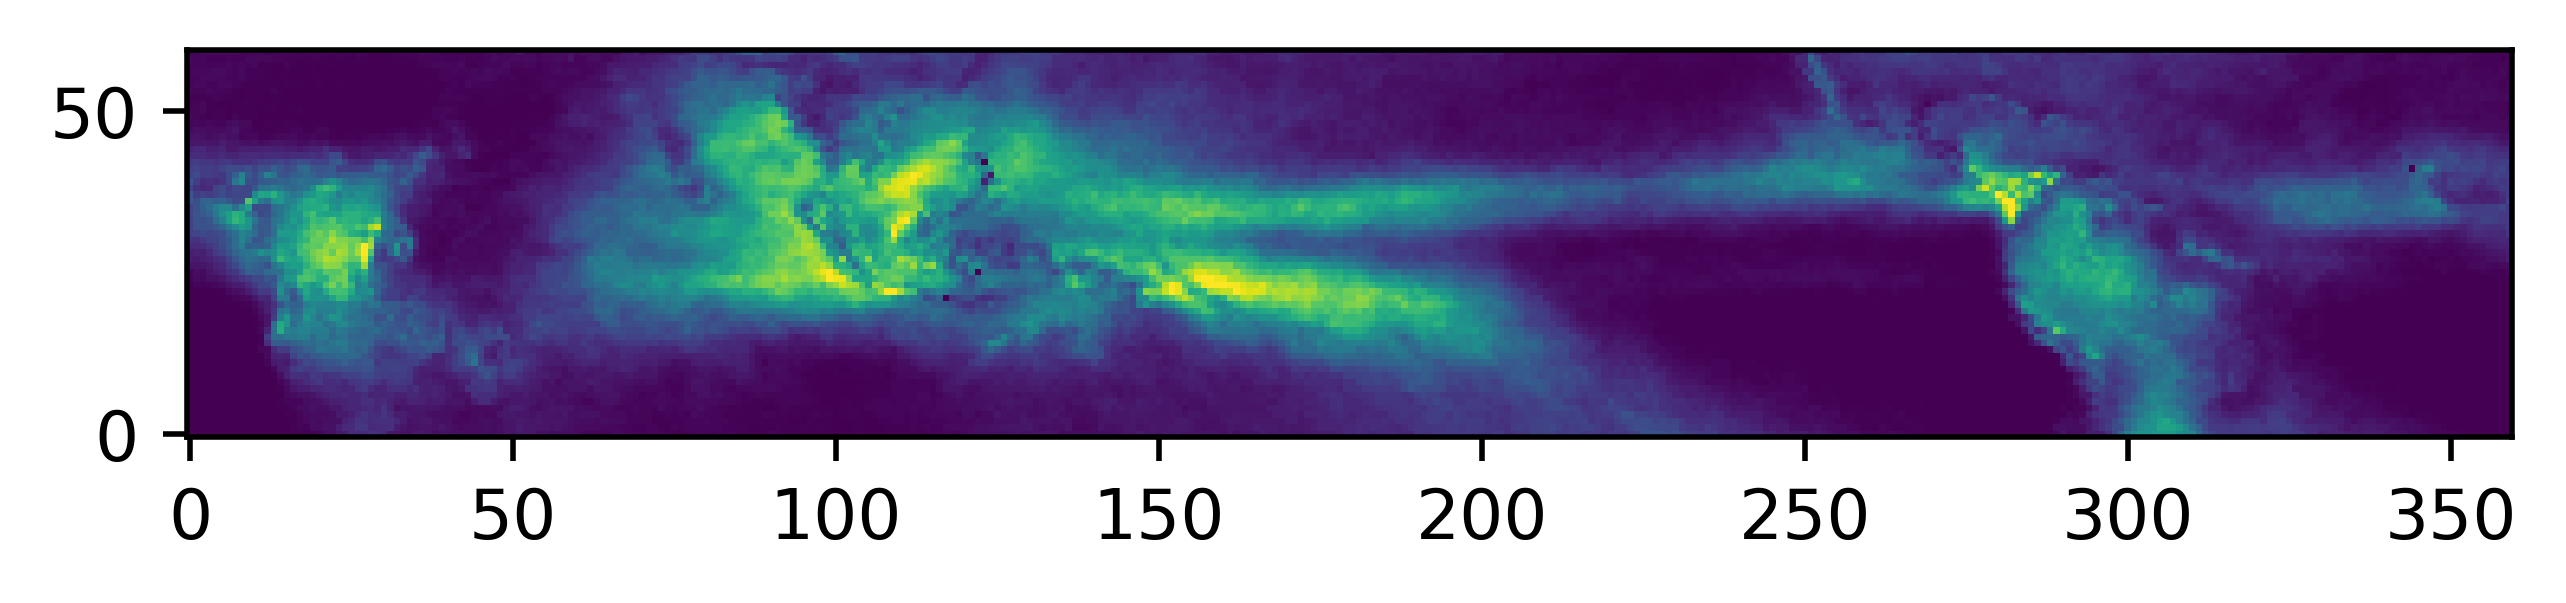

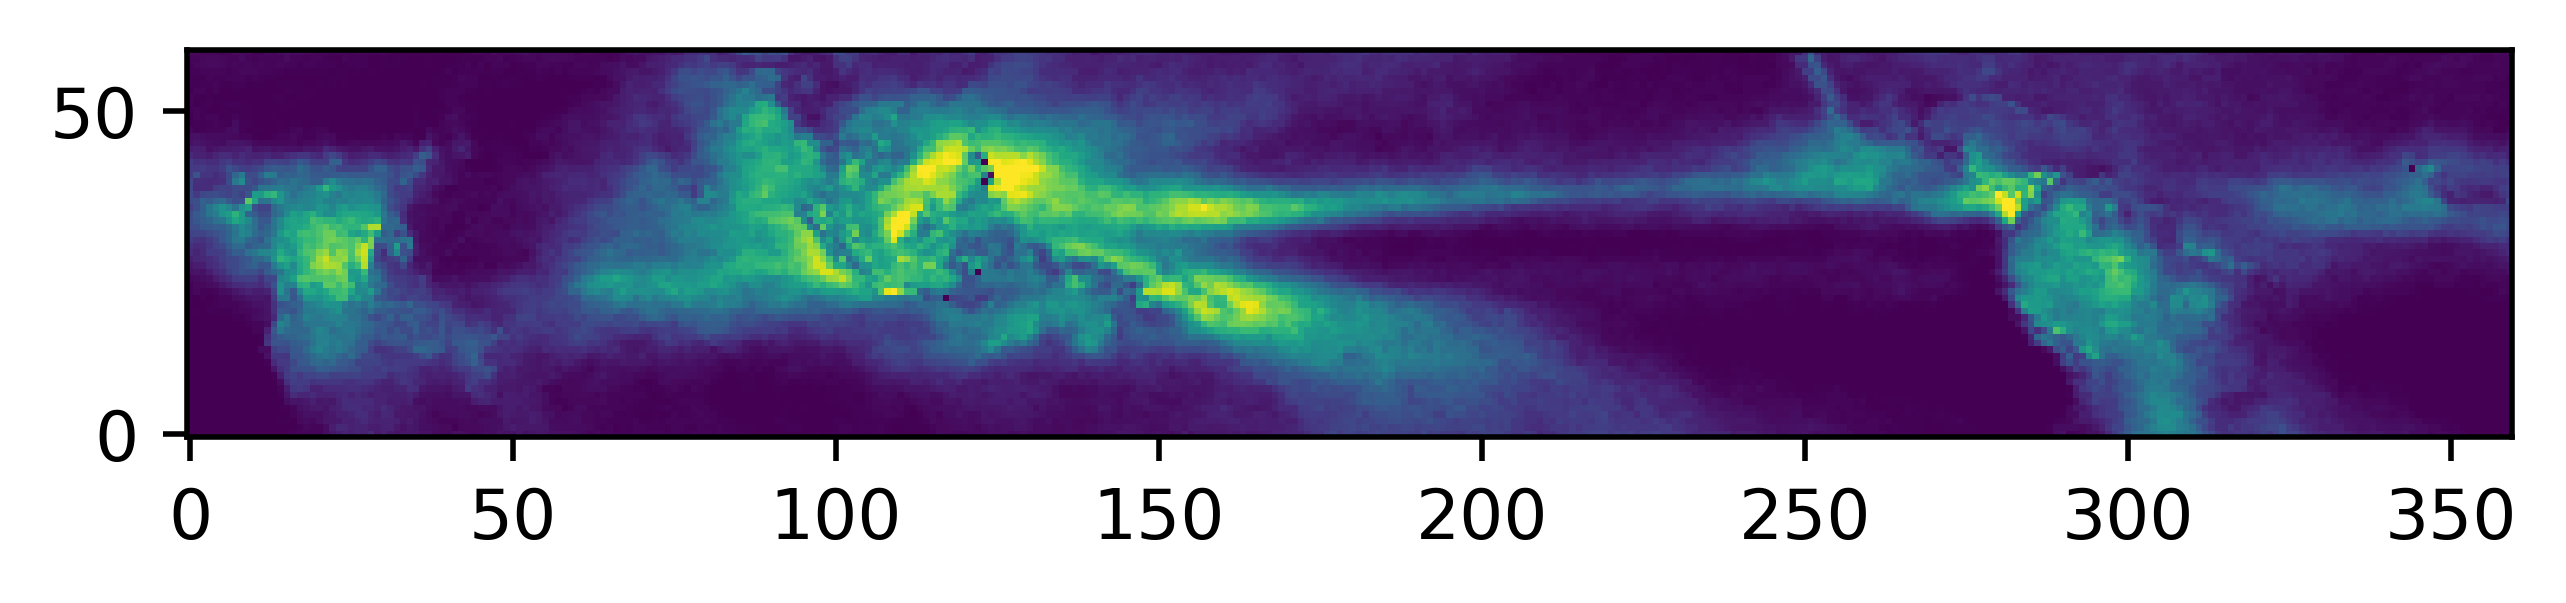

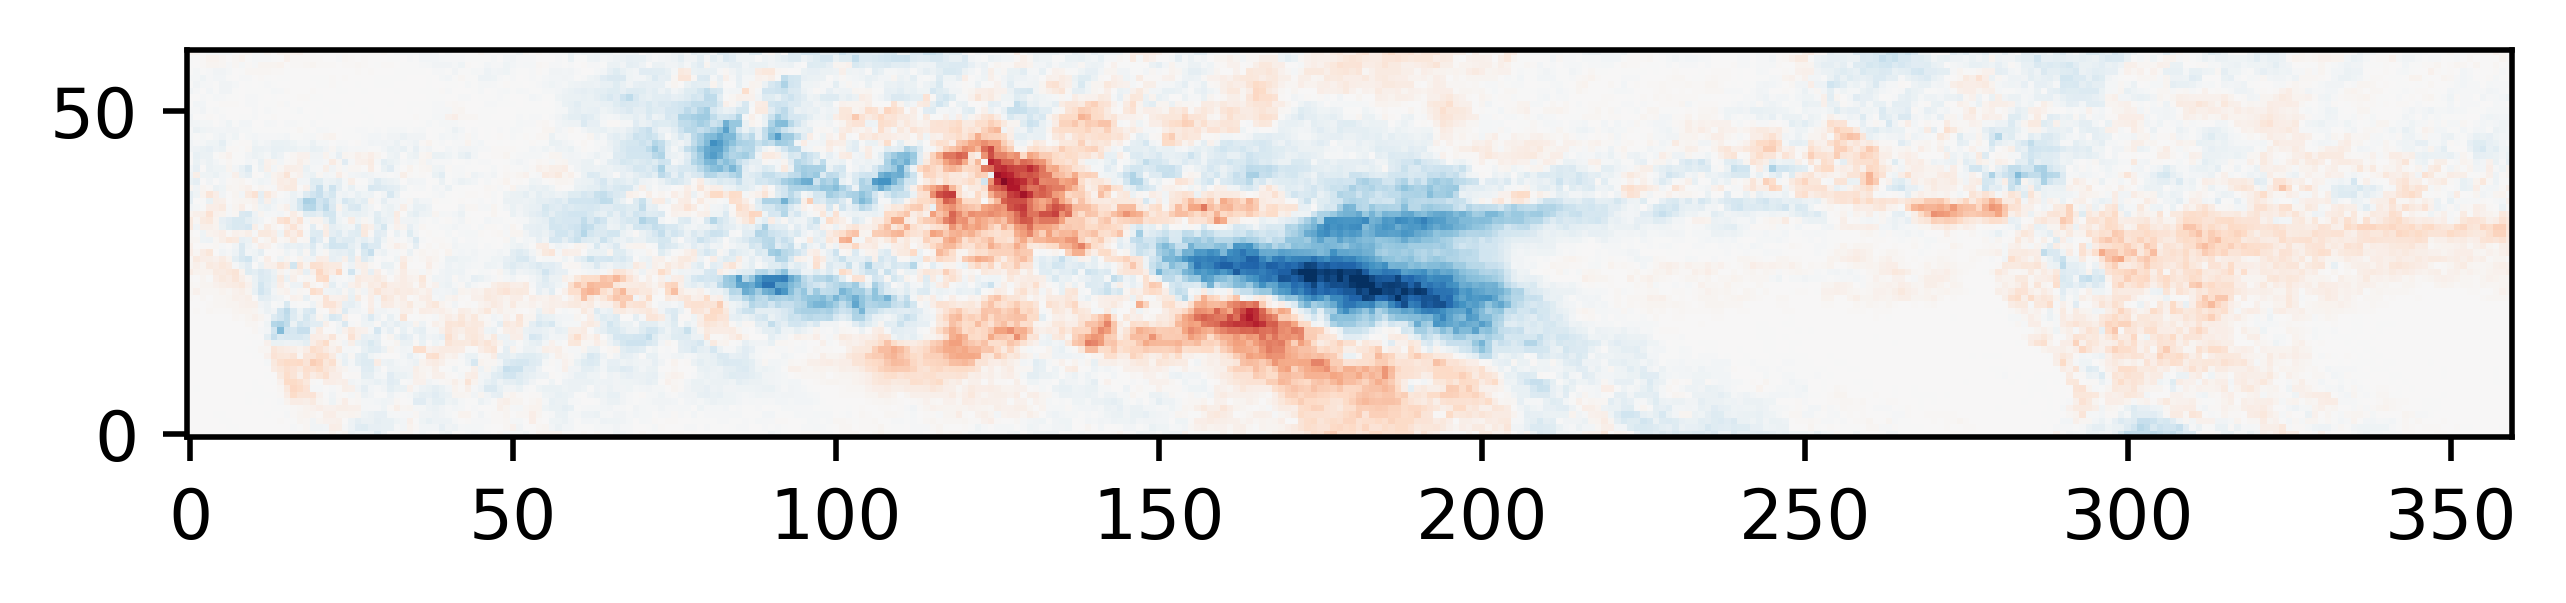

In [75]:
plt.figure(dpi=500)
plt.imshow(elninomap,origin='lower',vmax=200)
plt.figure(dpi=500)
plt.imshow(laninamap,origin='lower',vmax=200)
plt.figure(dpi=500)
plt.imshow(laninamap - elninomap,origin='lower',vmax=100,vmin=-100,cmap='RdBu_r')

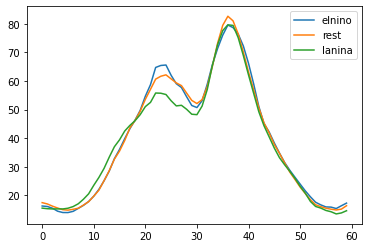

In [61]:
plt.plot(elnino,label='elnino')
plt.plot(restofyears,label='rest')
plt.plot(lanina,label='lanina')
#plt.plot(elnino-restofyears)
#plt.ylim(-6,8)
plt.legend()

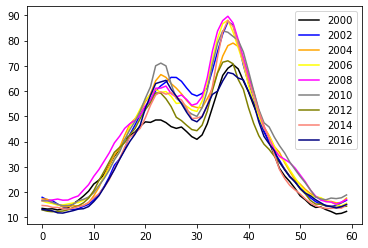

In [33]:
plt.plot(np.nanmean(SUM2000,axis=1),label='2000',color='black')
#plt.plot(np.nanmean(SUM2001,axis=1),label='2001',color='red')
plt.plot(np.nanmean(SUM2002,axis=1),label='2002',color='blue')
#plt.plot(np.nanmean(SUM2003,axis=1),label='2003',color='green')
plt.plot(np.nanmean(SUM2004,axis=1),label='2004',color='orange')
#plt.plot(np.nanmean(SUM2005,axis=1),label='2005',color='purple')
plt.plot(np.nanmean(SUM2006,axis=1),label='2006',color='yellow')
#plt.plot(np.nanmean(SUM2007,axis=1),label='2007',color='cyan')
plt.plot(np.nanmean(SUM2008,axis=1),label='2008',color='magenta')
#plt.plot(np.nanmean(SUM2009,axis=1),label='2009',color='brown')
plt.plot(np.nanmean(SUM2010,axis=1),label='2010',color='grey')
#plt.plot(np.nanmean(SUM2011,axis=1),label='2011',color='pink')
plt.plot(np.nanmean(SUM2012,axis=1),label='2012',color='olive')
#plt.plot(np.nanmean(SUM2013,axis=1),label='2013',color='gold')
plt.plot(np.nanmean(SUM2014,axis=1),label='2014',color='salmon')
#plt.plot(np.nanmean(SUM2015,axis=1),label='2015',color='teal')
plt.plot(np.nanmean(SUM2016,axis=1),label='2016',color='navy')
plt.legend()

In [5]:
yearlymean = np.zeros(17)
yearlymean[0] = np.nansum(SUM2000)
yearlymean[1] = np.nansum(SUM2001)
yearlymean[2] = np.nansum(SUM2002)
yearlymean[3] = np.nansum(SUM2003)
yearlymean[4] = np.nansum(SUM2004)
yearlymean[5] = np.nansum(SUM2005)
yearlymean[6] = np.nansum(SUM2006)
yearlymean[7] = np.nansum(SUM2007)
yearlymean[8] = np.nansum(SUM2008)
yearlymean[9] = np.nansum(SUM2009)
yearlymean[10] = np.nansum(SUM2010)
yearlymean[11] = np.nansum(SUM2011)
yearlymean[12] = np.nansum(SUM2012)
yearlymean[13] = np.nansum(SUM2013)
yearlymean[14] = np.nansum(SUM2014)
yearlymean[15] = np.nansum(SUM2015)
yearlymean[16] = np.nansum(SUM2016)

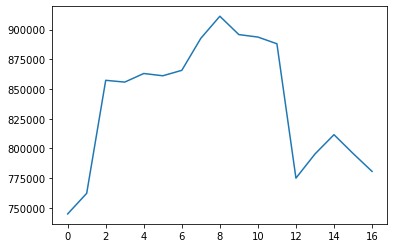

In [6]:
plt.plot(yearlymean)

In [93]:
count

array([[[<ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>, ...,
         <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>],
        [<ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>, ...,
         <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>],
        [<ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>, ...,
         <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>],
        ...,
        [<ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>, ...,
         <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>],
        [<ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>, ...,
         <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>],
        [<ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>, ...,
         <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>]],

       [[<ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>, ...,
         <ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>],
        [<ufunc 'isnan'>, <ufunc 'isnan'>, <ufunc 'isnan'>, ...,
         <ufunc 'isnan'>, <ufunc 'isna

In [25]:
totaltimeseries = []
timeseries = []
for years in range(2000,2016):
    for month in range(1,3):
        isccpdcc = xr.open_mfdataset('/disk1/Users/gah20/DCC/'+str(years)+'/'+str(month).zfill(2)+'.nc')['DCC'][:,60:120]
        count = np.where(np.isnan(isccpdcc),np.nan,1)
        timeseries.append(count)
        total = np.nansum(count)
        totaltimeseries.append(total)


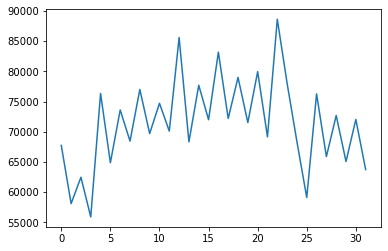

In [31]:
plt.plot((totaltimeseries[:]))

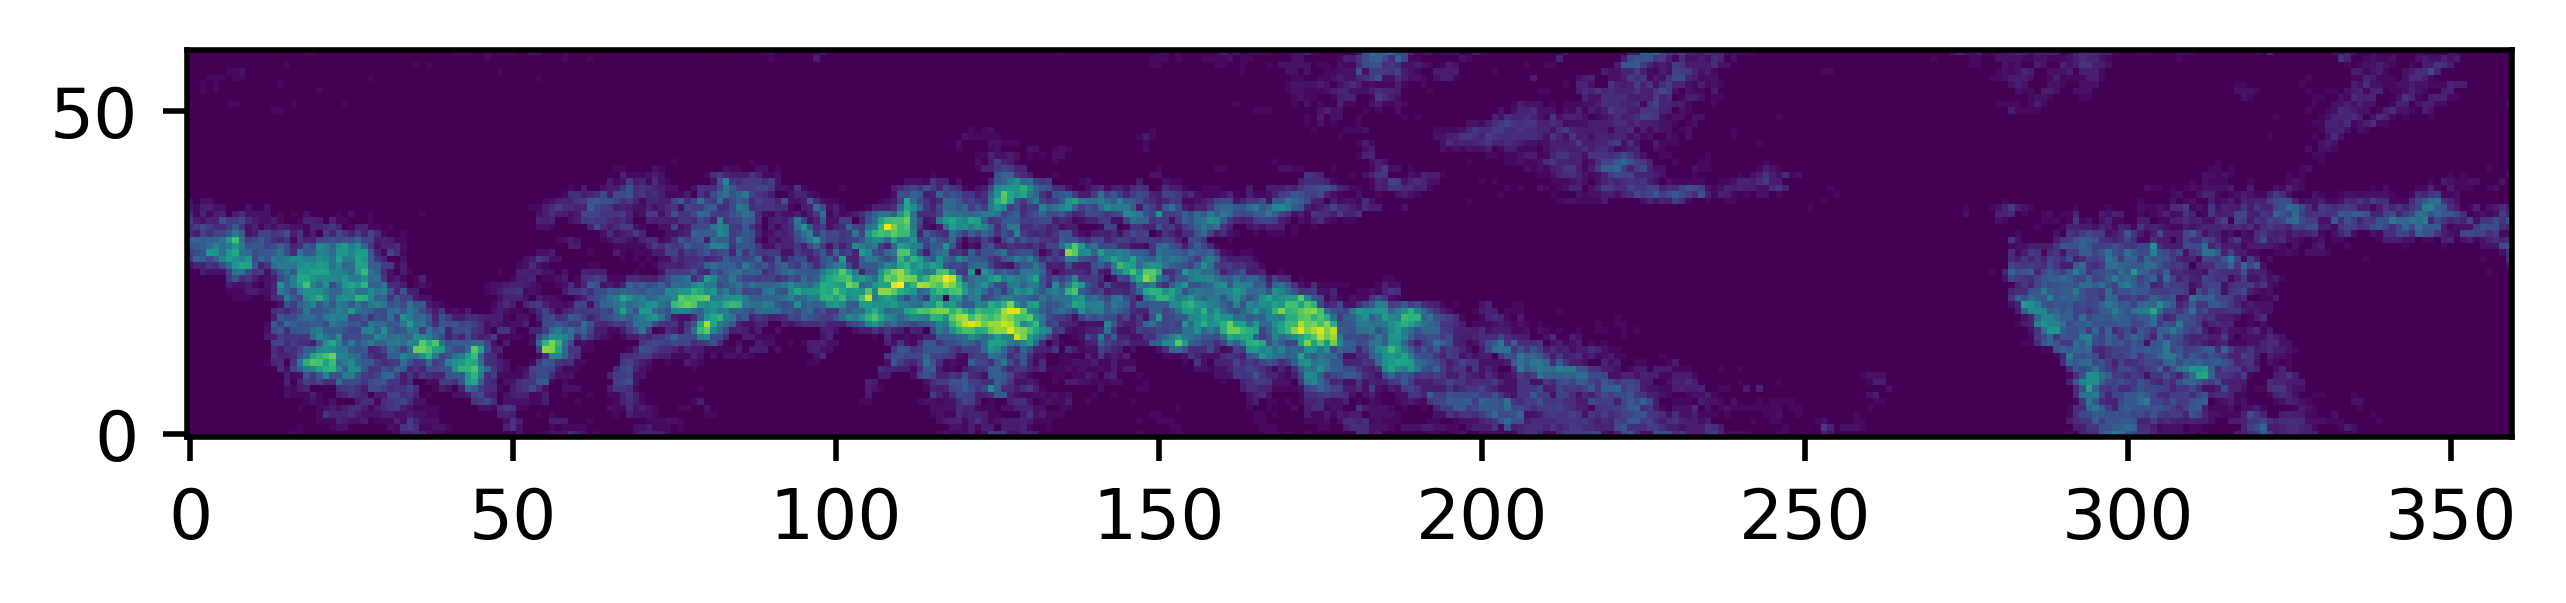

In [19]:
plt.figure(dpi=500)
j=12
plt.imshow(np.nansum(timeseries[0],axis=0),interpolation='none',origin='lower',vmax=40)